## Part 0 : Setting up an IBM Quantum Account (Do this before the session!) 

1. Go to the <a href = "https://quantum-computing.ibm.com/">IBM Quantum login page. </a>
2. Click on “Create an IBMid”. This should take you to a new page
3. Under “Don’t have an account?” click the “Create an IBMid” button.
4. **Use your wisc emailID to signup**. This is to prevent an security issues you might encounter otherwise. Fill in the rest of the form and verify your email.

You should now be able to login at the IBM Quantum login page with your wisc emailID as your IBMid and the password you entered in the form.


# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

In [40]:
import numpy as np
from numpy import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

In [41]:
import numpy as np
from numpy import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html

It will help you to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in Qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises by applying the correct rotations. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 
<div><img src="attachment:state1.png" width="200"></div>

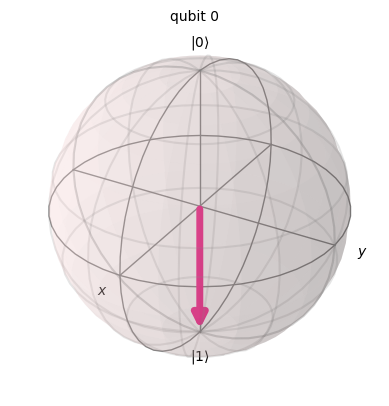

In [42]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    #
    qc.x(0)
    # FILL YOUR CODE IN HERE
    #
    #
    return qc


state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

<div>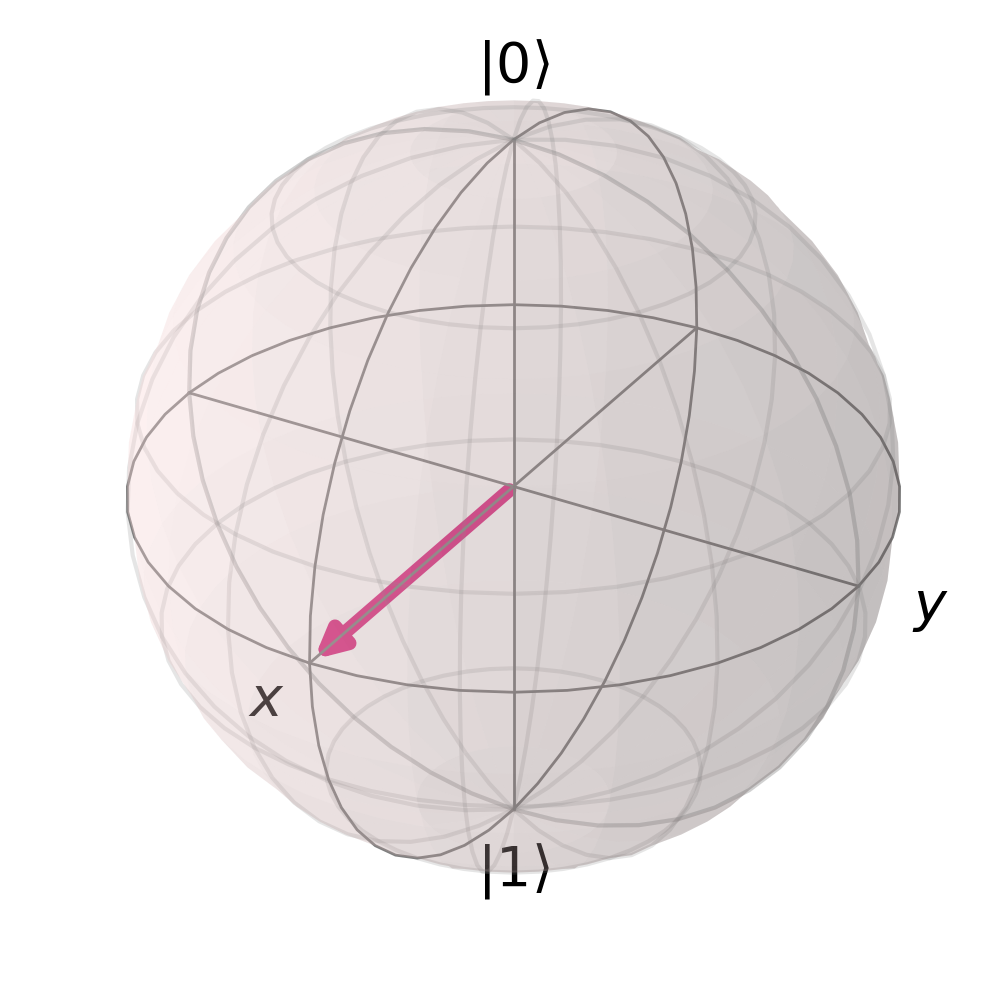</div>

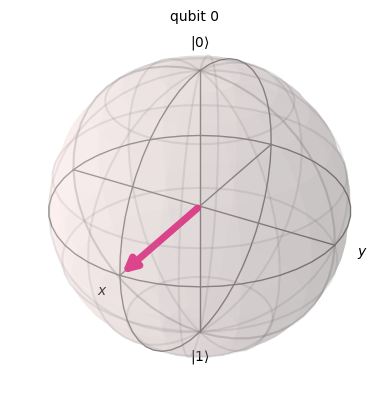

In [44]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    #
    qc.h(0)
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex2())
plot_bloch_multivector(state)

### 3.) Let's combine the two operations seen before. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

<div>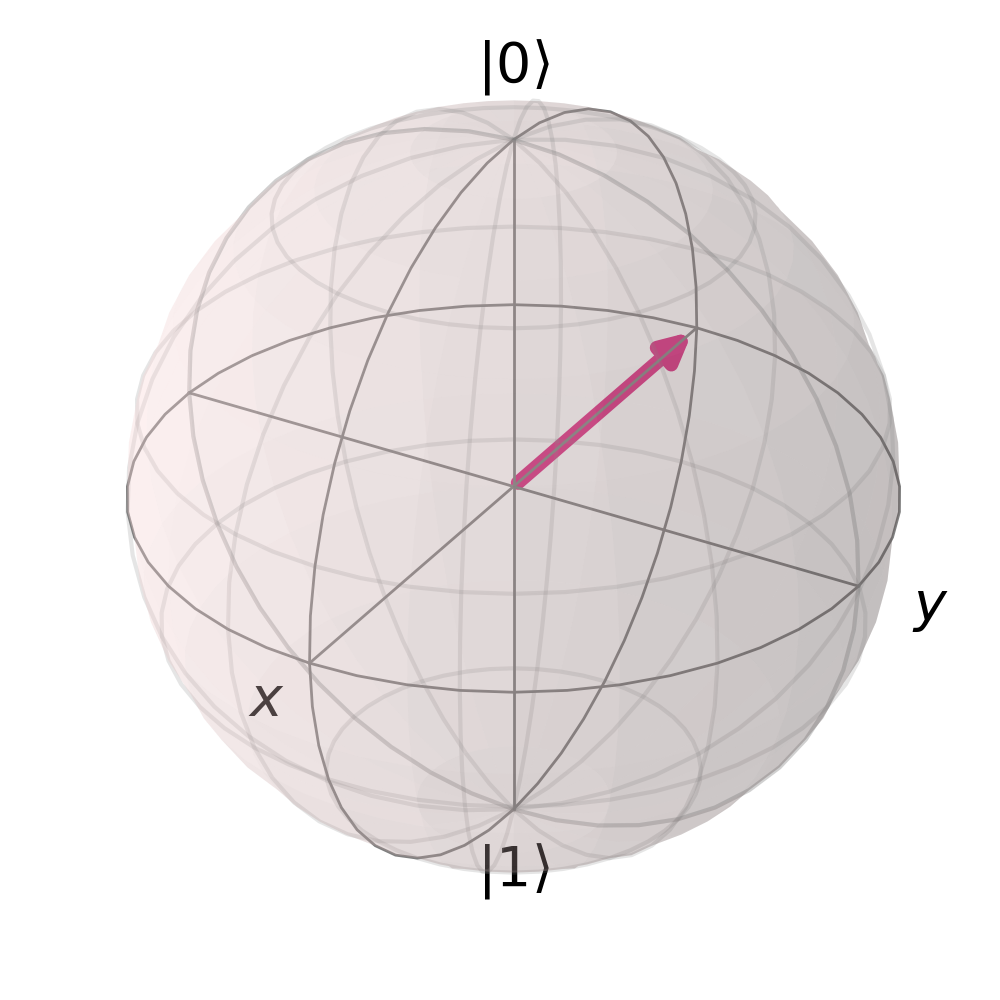</div>

Can you even come up with different ways?

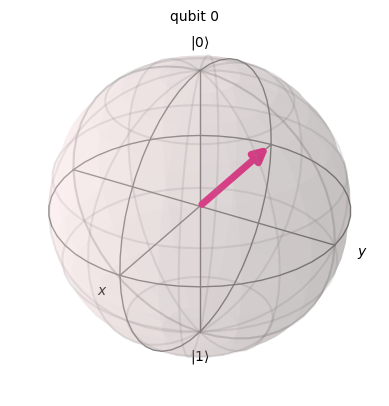

In [46]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    #
    qc.x(0)
    qc.h(0)
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

<div><img src=attachment:leftstate.png width="200"></div>
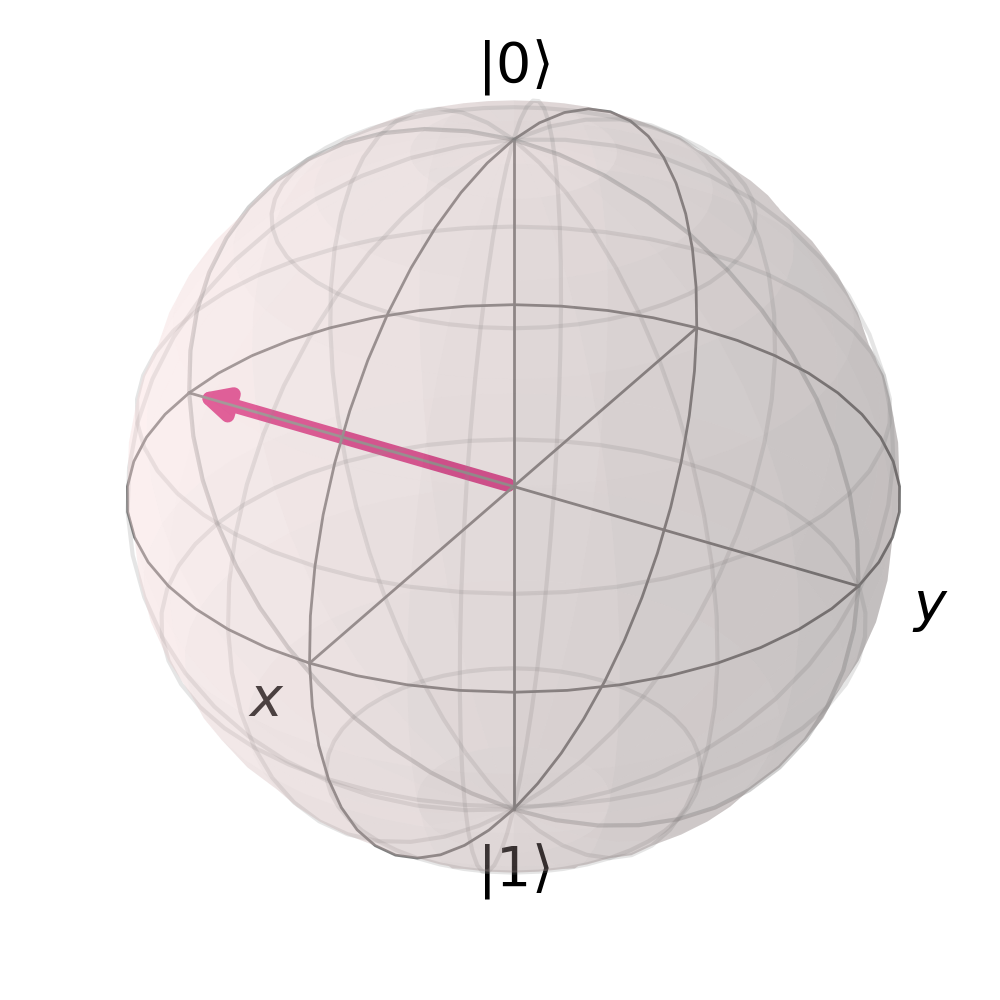

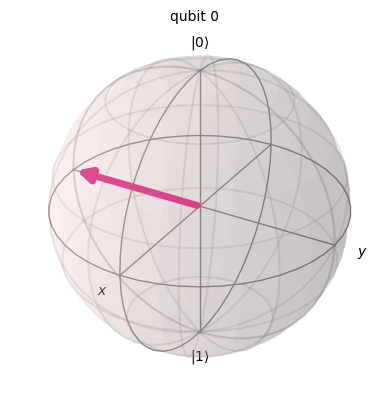

In [48]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.sdg(0)
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html

The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. The CNOT gate has no effect when applied on two qubits in state $|0\rangle$, but this changes if we apply a Hadamard gate before to the control qubit to bring it in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. There are four Bell states in total, so let's try to also construct another one:


### 5.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

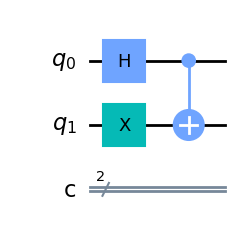

In [50]:
def lab1_ex5():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2) 
    #
    qc.h(0)
    qc.x(1)
    qc.cx(0,1)   
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = lab1_ex5()
qc.draw() # we draw the circuit

Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

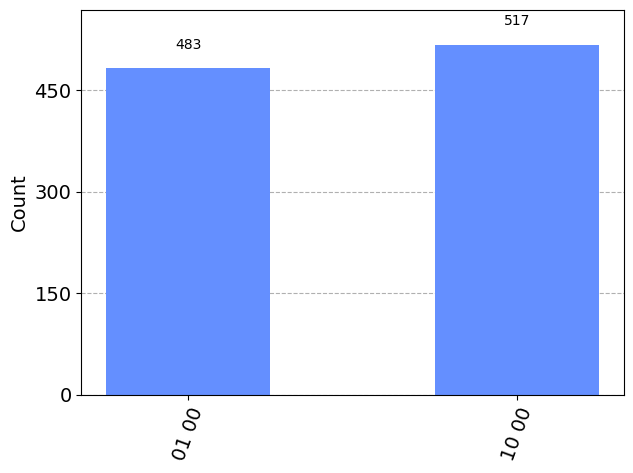

In [52]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

### 6.) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - |100 \rangle \right)$.
Hint: the following circuit constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

<div>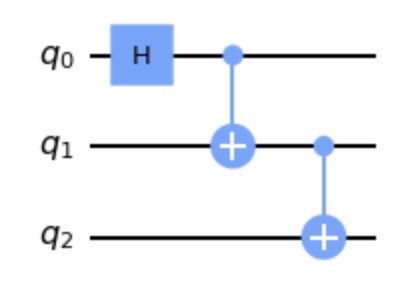</div>

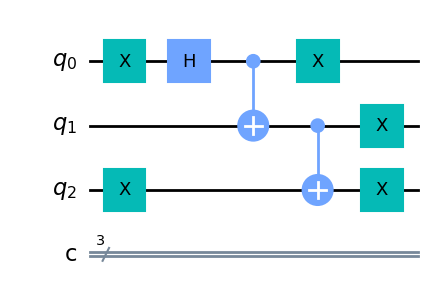

In [53]:
def lab1_ex6():
    # This time, we need 3 qubits and also add 3 classical bits in case we want to measure
    qc = QuantumCircuit(3,3) 
    #
    #
    qc.x(0)
    qc.h(0)
    qc.x(2)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.x(0)
    qc.x(1)
    qc.x(2)   
    # FILL YOUR CODE IN HERE
    #
    return qc

qc = lab1_ex6()
qc.draw() # we draw the circuit

We can now also measure this circuit the same way we did before.

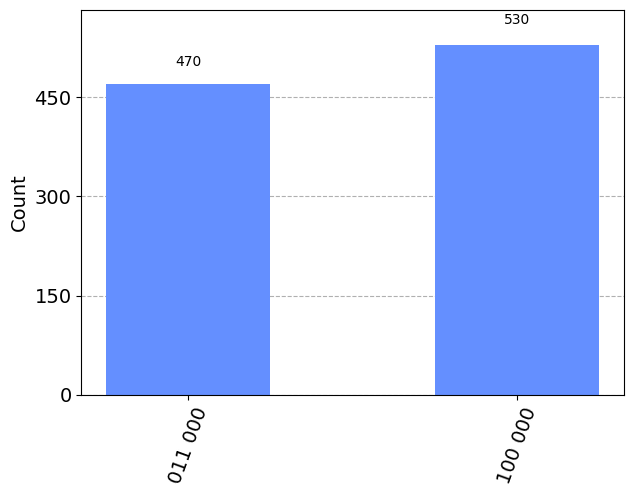

In [54]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [55]:
counts

{'011 000': 470, '100 000': 530}

As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

<div class="alert alert-block alert-success">

### Exercise: Create a 3 qubit GHZ State and measure it.


</div>

In [ ]:
# Recreate the circuit as shown below

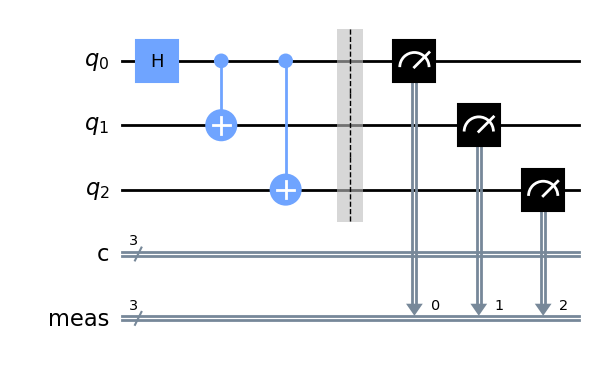

In [57]:
# Exercise: Recreate the circuit as shown above.
ghz = QuantumCircuit(3,3)
# Add a H gate on qubit 0, putting this qubit in superposition.
ghz.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.

ghz.cx(0,1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.

ghz.cx(0,2)

# Measure qubits

ghz.measure_all()

# Draw the circuit
ghz.draw(output="mpl")


Total count for 000 and 111 are: {'000 000': 491, '111 000': 509}


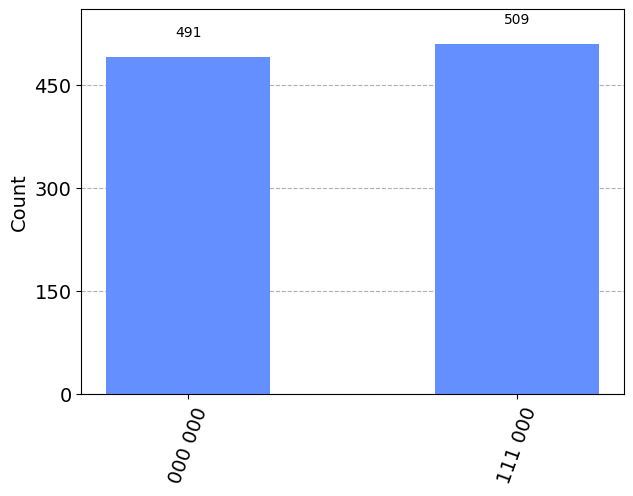

In [60]:
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(ghz, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [61]:
counts

{'000 000': 491, '111 000': 509}